In [5]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Loading the other modules I have in parent directories
import sys
PYTHONPATH="../"
sys.path.append(PYTHONPATH)
from dataProcessing import getDataLoaders
from models import ThreeCNN, ThreeCNN_Module, rnn_2dCNN
from train import check_accuracy, train, train_ThreeCNN
from plottingFcts import trainingMetrics, sigBkgEff, plotROC
from imageNumber_analysis import num_valAcc 
from learn_rate_optimize import filters_optimize, lr_optimize, lr_filters_optimize
import matplotlib.pyplot as plt

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
layer0_params = [80, 3, 3, 1, 1]
layer0_reduce = [1, 3, 93, 1, 1] # ---> Downsampling with one filter at the end

layer1_params = [80, 3, 3, 1, 1]
layer1_reduce = [1, 12, 9, 1, 1] # ---> Downsampling with one filter 

layer2_params = [80, 3, 3, 1, 1]
layer2_reduce = [1, 12, 3, 1, 1] # ---> downsampling with one filter 

rnn_params = [18, 18, 1]

layer3_params = [32, 3, 3, 1, 1]

fc_params = [18, 150, 100, 50, 3, 0.5]

In [7]:
batch_size = 64
loader_train, loader_val, loader_test = getDataLoaders(batch_size=batch_size, N=30000)

In [9]:
advanced_rnn_2 = rnn_2dCNN(layer0_params, layer0_reduce, layer1_params, layer1_reduce, layer2_params, layer2_reduce, rnn_params, layer3_params, fc_params)

adv_optimizer = optim.Adam(advanced_rnn_2.parameters(), lr=4e-3)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(adv_optimizer, mode='max', patience=5, verbose=True)

hist, advModel = train(loader_train, loader_val, advanced_rnn_2, adv_optimizer, scheduler, epochs=50, returnBest=True)

# save the best movel from training for 100 epochs 
torch.save(advModel.state_dict(), "../models/advTraining_2.pth.tar")

cuda

Epoch 1/50:
Iteration 0, loss = 1.1670
cuda
Got 3139 / 9000 correct (34.88)

Iteration 100, loss = 0.6833
cuda
Got 5863 / 9000 correct (65.14)

Iteration 200, loss = 0.5442
cuda
Got 6029 / 9000 correct (66.99)

Iteration 300, loss = 0.4638
cuda
Got 6162 / 9000 correct (68.47)

Iteration 400, loss = 0.5616
cuda
Got 6507 / 9000 correct (72.30)

Iteration 500, loss = 0.6775
cuda
Got 6464 / 9000 correct (71.82)

Iteration 600, loss = 0.4839
cuda
Got 6715 / 9000 correct (74.61)

Iteration 700, loss = 0.4409
cuda
Got 6624 / 9000 correct (73.60)

Iteration 800, loss = 0.4549
cuda
Got 6722 / 9000 correct (74.69)

cuda
Got 6739 / 9000 correct (74.88)
cuda
Got 40233 / 54000 correct (74.51)

Epoch 2/50:
Iteration 0, loss = 0.3409
cuda
Got 6758 / 9000 correct (75.09)

Iteration 100, loss = 0.5224
cuda
Got 6629 / 9000 correct (73.66)

Iteration 200, loss = 0.4437
cuda
Got 6765 / 9000 correct (75.17)

Iteration 300, loss = 0.4210
cuda
Got 6740 / 9000 correct (74.89)

Iteration 400, loss = 0.42

cuda
Got 6986 / 9000 correct (77.62)
cuda
Got 41858 / 54000 correct (77.51)

Epoch 13/50:
Iteration 0, loss = 0.4080
cuda
Got 6980 / 9000 correct (77.56)

Iteration 100, loss = 0.3789
cuda
Got 6906 / 9000 correct (76.73)

Iteration 200, loss = 0.4271
cuda
Got 6901 / 9000 correct (76.68)

Iteration 300, loss = 0.3438
cuda
Got 6950 / 9000 correct (77.22)

Iteration 400, loss = 0.4811
cuda
Got 6990 / 9000 correct (77.67)

Iteration 500, loss = 0.4662
cuda
Got 6980 / 9000 correct (77.56)

Iteration 600, loss = 0.4974
cuda
Got 6886 / 9000 correct (76.51)

Iteration 700, loss = 0.4832
cuda
Got 7029 / 9000 correct (78.10)

Iteration 800, loss = 0.3658
cuda
Got 7021 / 9000 correct (78.01)

cuda
Got 6964 / 9000 correct (77.38)
cuda
Got 41618 / 54000 correct (77.07)

Epoch 14/50:
Iteration 0, loss = 0.5075
cuda
Got 6973 / 9000 correct (77.48)

Iteration 100, loss = 0.4127
cuda
Got 6982 / 9000 correct (77.58)

Iteration 200, loss = 0.4417
cuda
Got 6972 / 9000 correct (77.47)

Iteration 300, loss 

Iteration 600, loss = 0.2998
cuda
Got 7070 / 9000 correct (78.56)

Iteration 700, loss = 0.2657
cuda
Got 7043 / 9000 correct (78.26)

Iteration 800, loss = 0.4462
cuda
Got 7043 / 9000 correct (78.26)

cuda
Got 7071 / 9000 correct (78.57)
cuda
Got 42224 / 54000 correct (78.19)

Epoch 25/50:
Iteration 0, loss = 0.4484
cuda
Got 7064 / 9000 correct (78.49)

Iteration 100, loss = 0.4232
cuda
Got 7046 / 9000 correct (78.29)

Iteration 200, loss = 0.3979
cuda
Got 7045 / 9000 correct (78.28)

Iteration 300, loss = 0.4604
cuda
Got 7046 / 9000 correct (78.29)

Iteration 400, loss = 0.3201
cuda
Got 7073 / 9000 correct (78.59)

Iteration 500, loss = 0.3708
cuda
Got 7068 / 9000 correct (78.53)

Iteration 600, loss = 0.4360
cuda
Got 7041 / 9000 correct (78.23)

Iteration 700, loss = 0.3959
cuda
Got 7044 / 9000 correct (78.27)

Iteration 800, loss = 0.3925
cuda
Got 7043 / 9000 correct (78.26)

cuda
Got 7072 / 9000 correct (78.58)
cuda
Got 42225 / 54000 correct (78.19)

Epoch 26/50:
Iteration 0, loss 

Iteration 400, loss = 0.4980
cuda
Got 7026 / 9000 correct (78.07)

Iteration 500, loss = 0.3127
cuda
Got 7040 / 9000 correct (78.22)

Iteration 600, loss = 0.3111
cuda
Got 7029 / 9000 correct (78.10)

Iteration 700, loss = 0.4280
cuda
Got 7041 / 9000 correct (78.23)

Iteration 800, loss = 0.3954
cuda
Got 7050 / 9000 correct (78.33)

cuda
Got 7033 / 9000 correct (78.14)
cuda
Got 42194 / 54000 correct (78.14)

Epoch 37/50:
Iteration 0, loss = 0.2903
cuda
Got 7040 / 9000 correct (78.22)

Iteration 100, loss = 0.3743
cuda
Got 7050 / 9000 correct (78.33)

Iteration 200, loss = 0.3573
cuda
Got 7034 / 9000 correct (78.16)

Iteration 300, loss = 0.2871
cuda
Got 7040 / 9000 correct (78.22)

Iteration 400, loss = 0.4185
cuda
Got 7054 / 9000 correct (78.38)

Iteration 500, loss = 0.4044
cuda
Got 7044 / 9000 correct (78.27)

Iteration 600, loss = 0.4538
cuda
Got 7008 / 9000 correct (77.87)

Iteration 700, loss = 0.2897
cuda
Got 7047 / 9000 correct (78.30)

Iteration 800, loss = 0.4271
cuda
Got 706

Iteration 100, loss = 0.3564
cuda
Got 7052 / 9000 correct (78.36)

Iteration 200, loss = 0.3597
cuda
Got 7022 / 9000 correct (78.02)

Iteration 300, loss = 0.3296
cuda
Got 7051 / 9000 correct (78.34)

Iteration 400, loss = 0.4020
cuda
Got 7034 / 9000 correct (78.16)

Iteration 500, loss = 0.4288
cuda
Got 7074 / 9000 correct (78.60)

Iteration 600, loss = 0.4631
cuda
Got 7058 / 9000 correct (78.42)

Iteration 700, loss = 0.6058
cuda
Got 7051 / 9000 correct (78.34)

Iteration 800, loss = 0.3808
cuda
Got 7045 / 9000 correct (78.28)

cuda
Got 7026 / 9000 correct (78.07)
cuda
Got 42271 / 54000 correct (78.28)

Epoch 49/50:
Iteration 0, loss = 0.4273
cuda
Got 7011 / 9000 correct (77.90)

Iteration 100, loss = 0.3611
cuda
Got 7048 / 9000 correct (78.31)

Iteration 200, loss = 0.3940
cuda
Got 7056 / 9000 correct (78.40)

Iteration 300, loss = 0.4649
cuda
Got 7013 / 9000 correct (77.92)

Iteration 400, loss = 0.4245
cuda
Got 7040 / 9000 correct (78.22)

Iteration 500, loss = 0.4611
cuda
Got 705

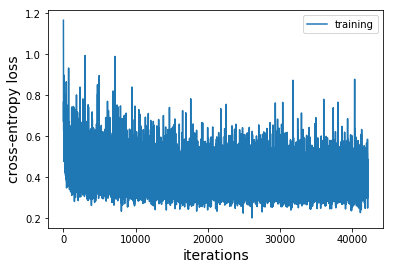

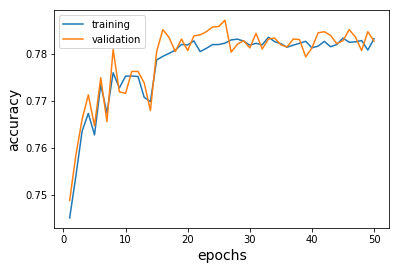

In [10]:
trainingMetrics(hist)

In [11]:
torch.save(advModel.state_dict(), "../models/advTraining_2.pth.tar")